## AIN 214 Project : Flood Prediction

Students :

    * Kerem Örer , 2220765013
    * Yiğit Kaya Bağcı , 2220765032

Data link :  https://drive.google.com/file/d/1C5BMwt2Zewd2MV9d2YY3cRht-z6ljKTh/view?usp=drive_link

if you dont have gdown , you can run the code below

In [ ]:
# pip install gdown 

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    KFold
)
from sklearn.preprocessing import (
    MinMaxScaler, 
    StandardScaler, 
    LabelEncoder, 
    scale
)
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    r2_score, 
    roc_auc_score, 
    roc_curve, 
    classification_report, 
    mean_squared_error, 
    precision_recall_curve, 
    auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier
)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

os.environ["OMP_NUM_THREADS"] = "2"


# Step 1: Data Collection

### Load the data

In [2]:
file_id = "1C5BMwt2Zewd2MV9d2YY3cRht-z6ljKTh"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_path = "flood.csv"
gdown.download(download_url, output_path, quiet=False)

data = pd.read_csv(output_path)

Downloading...
From: https://drive.google.com/uc?id=1C5BMwt2Zewd2MV9d2YY3cRht-z6ljKTh
To: C:\Users\gxgx1\OneDrive\Masaüstü\ain214proje\flood.csv
100%|██████████| 2.35M/2.35M [00:01<00:00, 1.95MB/s]


In [3]:
data

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


# Step 2: Data Preprocessing and Cleaning

In [4]:
data.isnull().sum()  # there is no missing value

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [5]:
data["Is_Flood"] = data["FloodProbability"].apply(lambda x: 0 if x <= 0.5 else 1)
# convert the probabilities to 1 0 formation

In [6]:
data

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,Is_Flood
0,3,8,6,6,4,4,6,2,3,2,...,7,4,2,3,4,3,2,6,0.450,0
1,8,4,5,7,7,9,1,5,5,4,...,2,6,2,1,1,9,1,3,0.475,0
2,3,10,4,1,7,5,4,7,4,9,...,4,4,8,6,1,8,3,6,0.515,1
3,4,4,2,7,3,4,1,4,6,4,...,2,6,6,8,8,6,6,10,0.520,1
4,3,7,5,2,5,8,5,2,7,5,...,6,5,3,3,4,4,3,4,0.475,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,3,8,8,6,1,5,4,2,0.535,1
49996,3,10,3,8,3,3,4,4,3,11,...,6,3,6,4,4,2,4,5,0.510,1
49997,4,4,5,7,2,1,4,5,6,7,...,6,4,1,5,1,6,4,3,0.430,0
49998,4,5,4,4,6,3,10,2,6,11,...,3,4,7,6,2,4,0,11,0.515,1


In [7]:
data.drop(columns=["FloodProbability"], inplace=True)
data
# drop the FloodProbability column before the implementing the models

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,Is_Flood
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,1
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,1
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,1
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,1
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,1


In [8]:
data.drop_duplicates(inplace = True)
data 
# there is no duplicate row because the number of rows didnt change

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,Is_Flood
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,1
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,1
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,1
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,1
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,1


<function matplotlib.pyplot.show(close=None, block=None)>

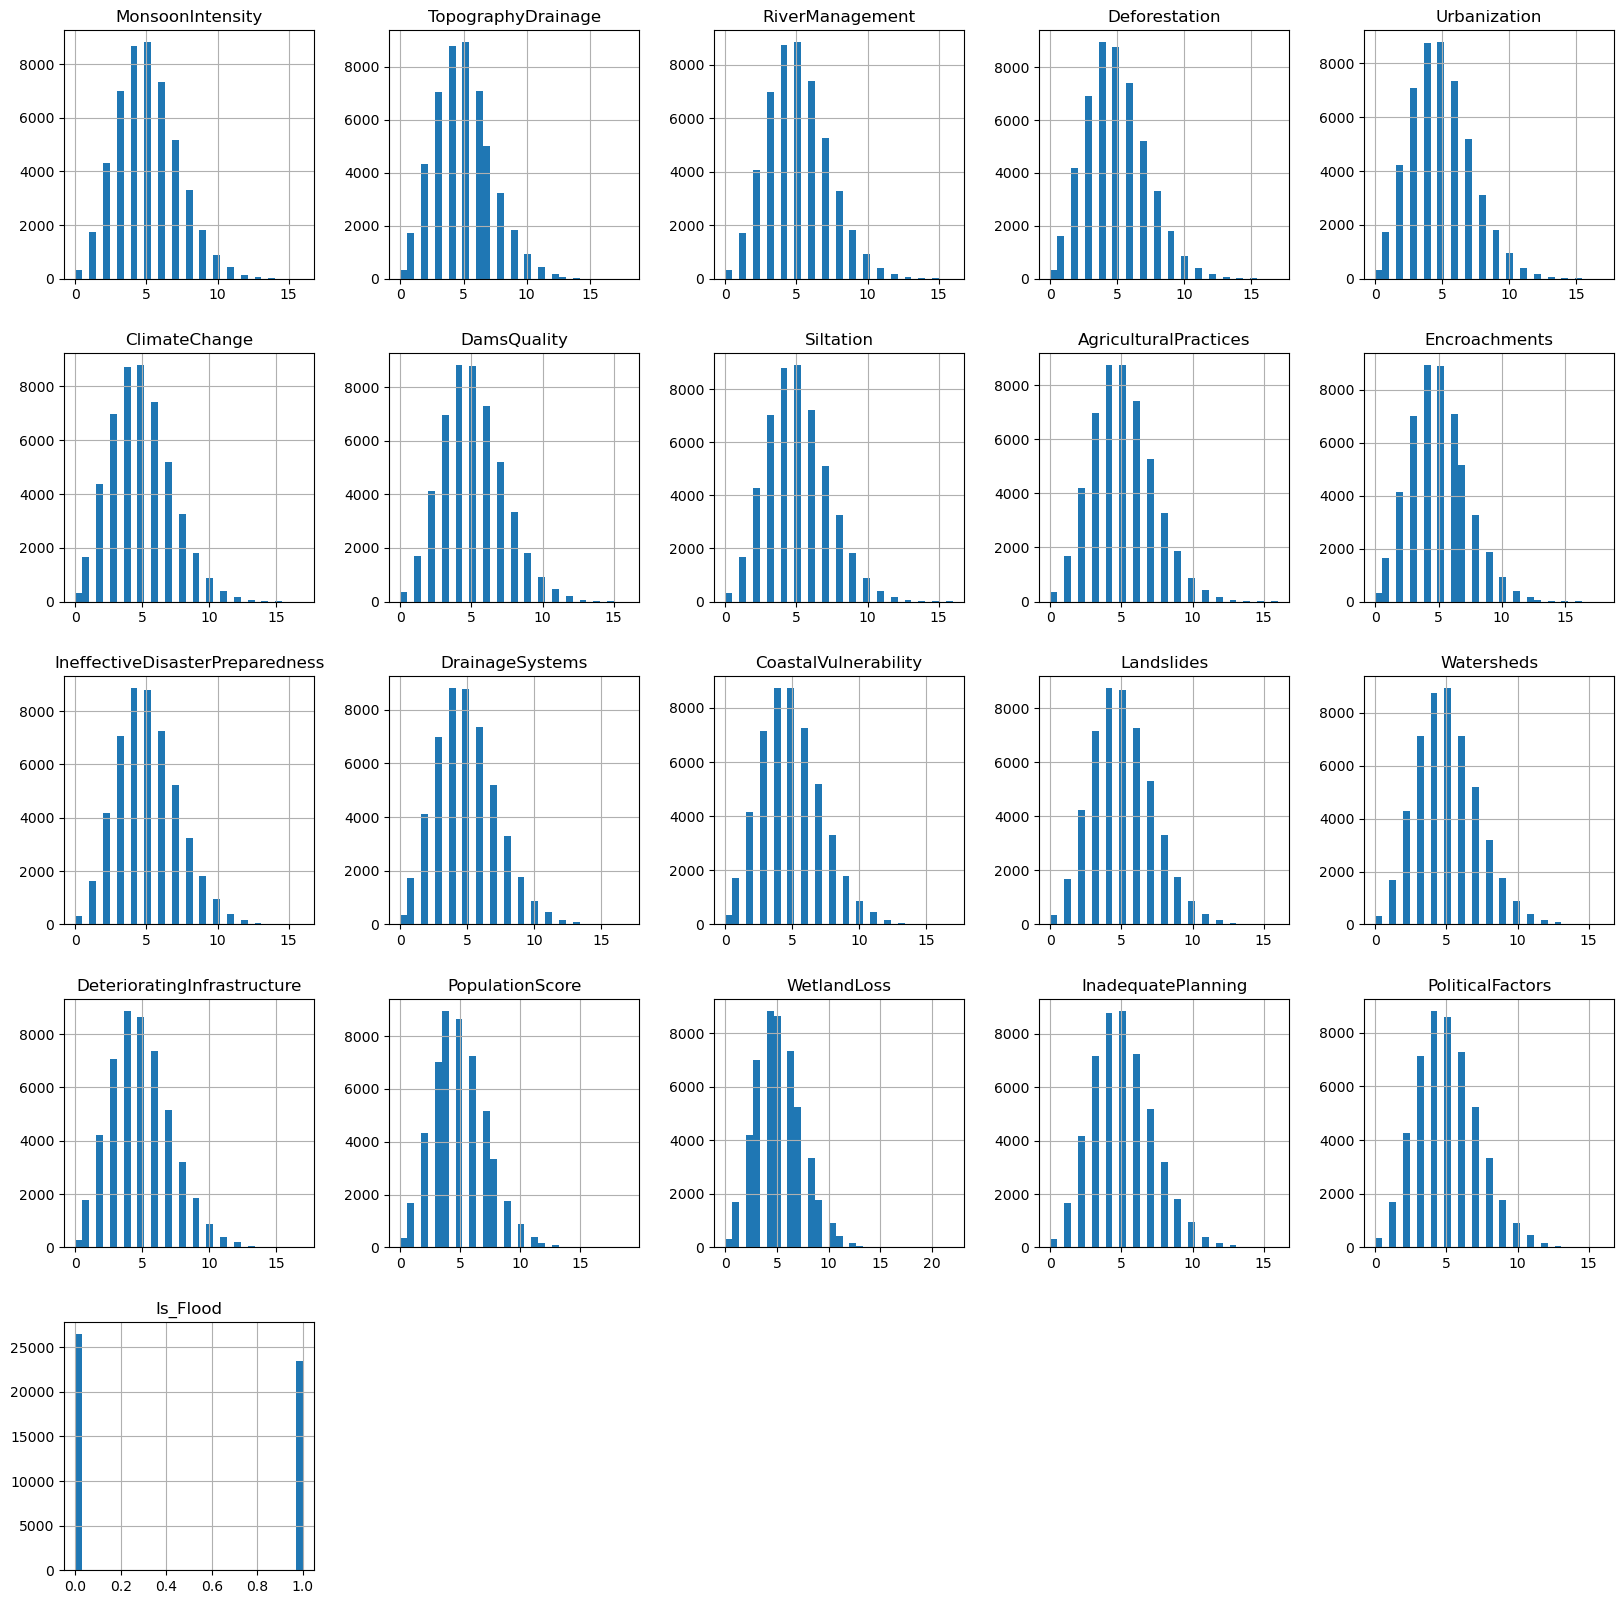

In [9]:
data.hist(bins = 33 ,figsize = (20,20))
plt.show
# visualize the data distributions
# the graphs are generally a bit skewed to the right
# there are more 0 s than 1 s int the target value Is_Flood

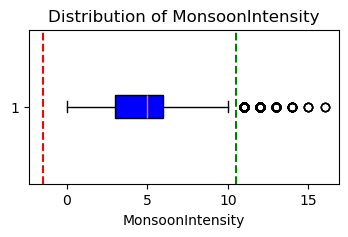

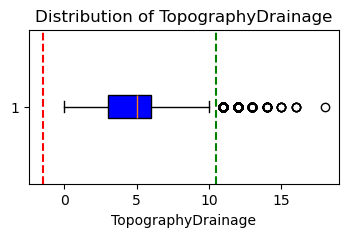

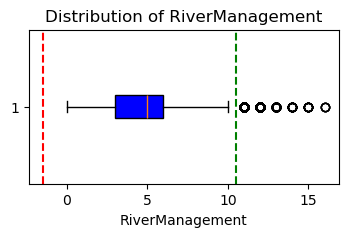

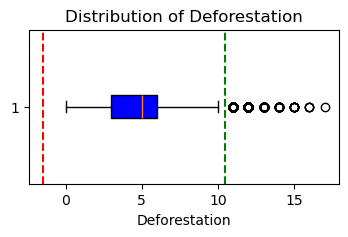

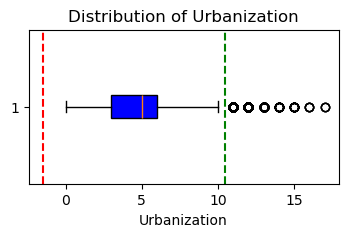

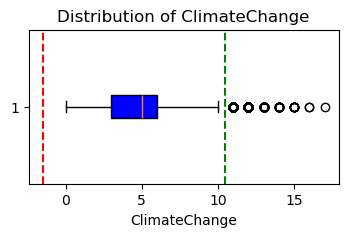

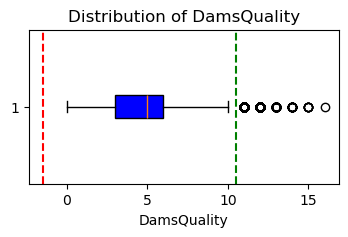

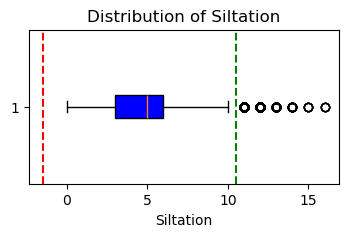

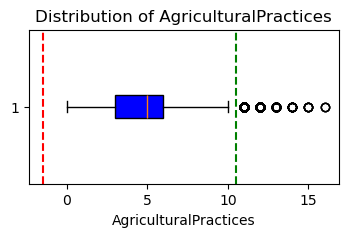

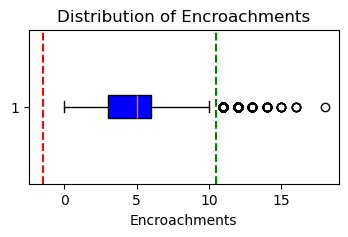

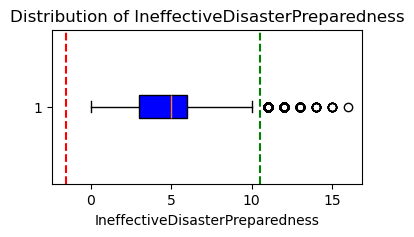

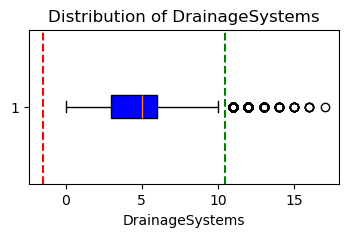

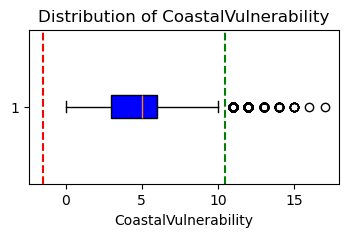

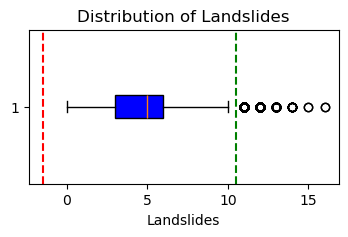

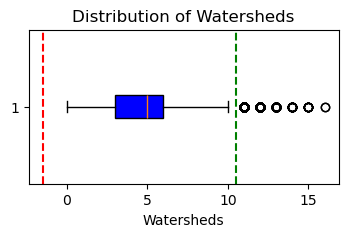

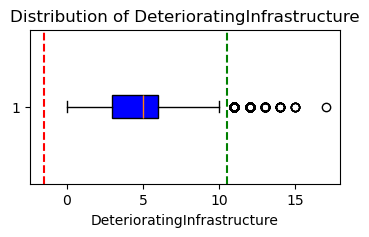

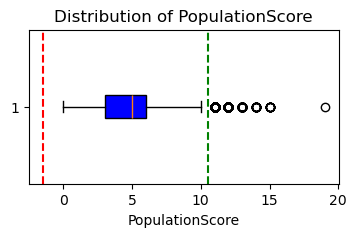

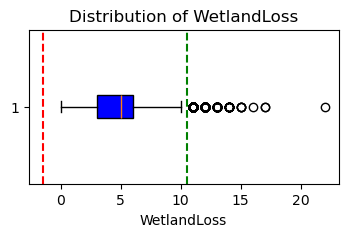

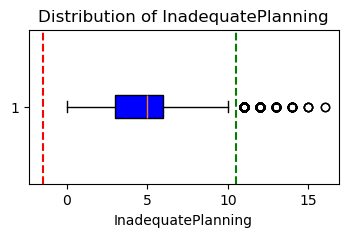

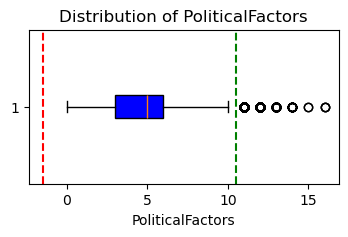

In [10]:

# detect the outliers and remove them , and visualize before and after graphs

df = data.copy()

column_list = data.columns.to_list()

column_list.remove("Is_Flood")

for column in column_list:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    outlier_condition = ((df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR))

    low =  Q1 - 1.5 * IQR

    high =  Q3 + 1.5 * IQR


    plt.figure(figsize = (4,2))
    plt.boxplot(df[column], vert=False, patch_artist=True,
                boxprops=dict(facecolor='blue', color='black'))
    plt.axvline(low, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(high, color='green', linestyle='--', label='Upper Bound')
    plt.xlabel(column)
    plt.title("Distribution of " + column )
    plt.show()
    
    df = df.loc[~outlier_condition]


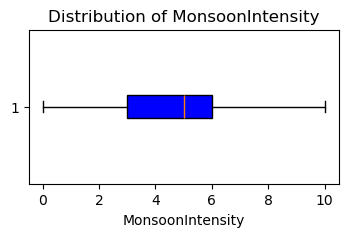

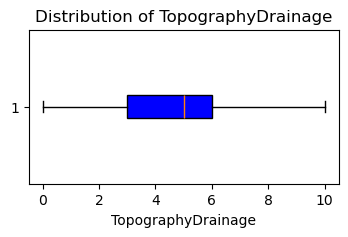

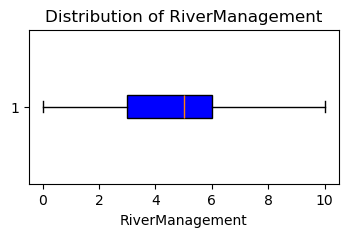

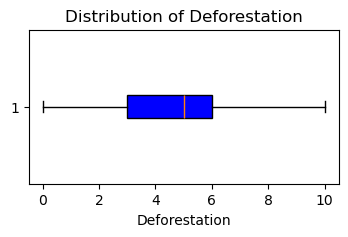

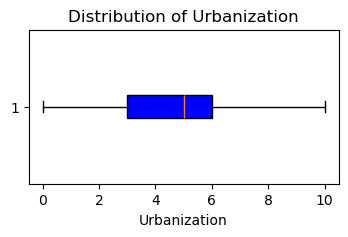

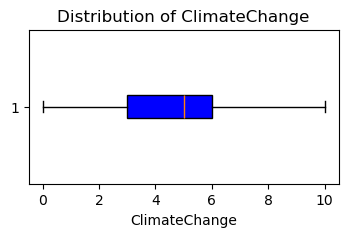

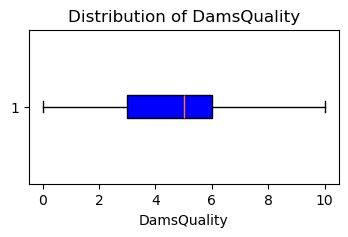

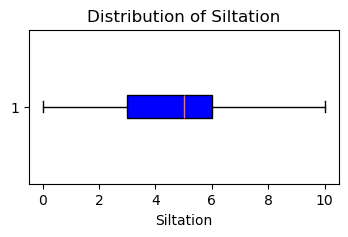

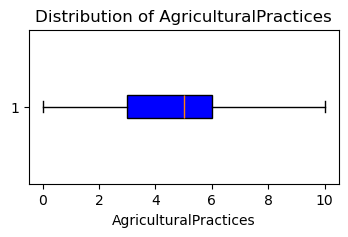

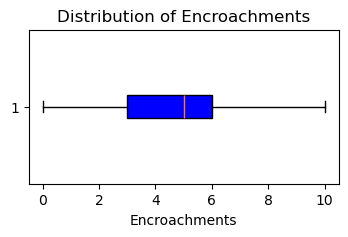

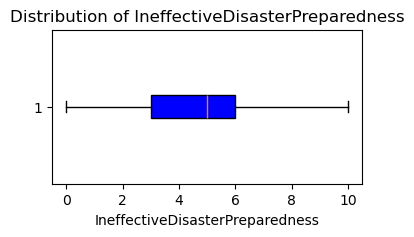

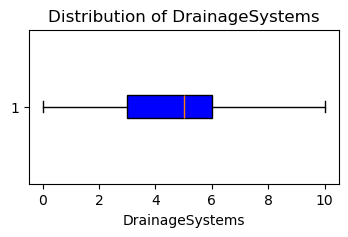

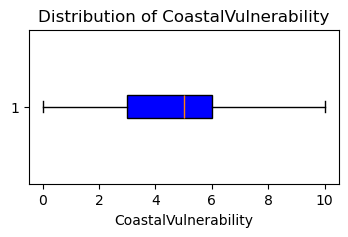

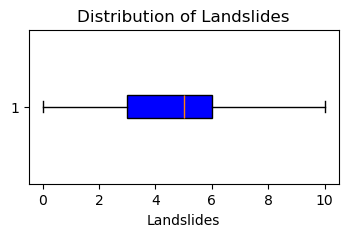

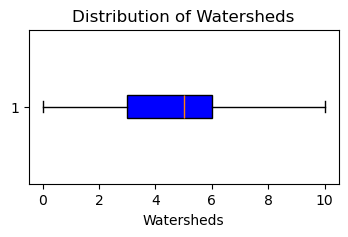

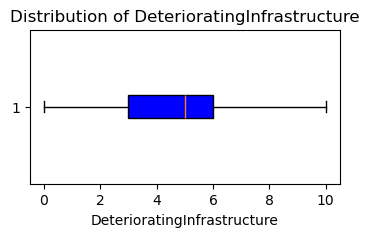

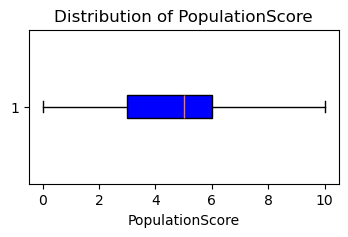

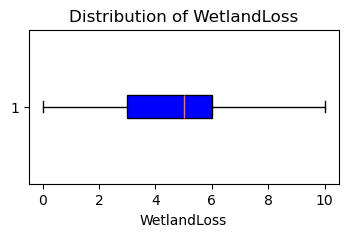

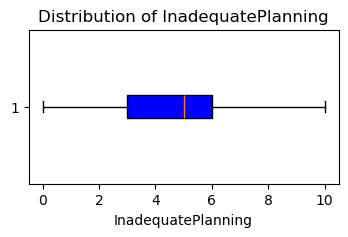

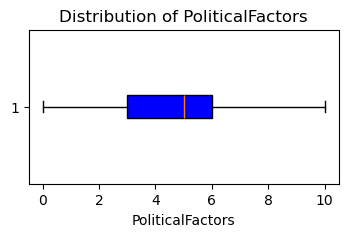

In [11]:

# visualize the graphs after removing the outliers 
for column in column_list:

    plt.figure(figsize = (4,2))
    plt.boxplot(df[column], vert=False, patch_artist=True,
                boxprops=dict(facecolor='blue', color='black'))
    plt.xlabel(column)
    plt.title("Distribution of " + column )
    plt.show()

In [12]:
df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,Is_Flood
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,1
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,1
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,5,8,7,6,6,6,4,2,7,6,...,5,1,8,3,6,4,5,3,7,1
49994,6,5,3,5,9,4,6,6,3,5,...,6,3,6,8,2,9,7,5,4,1
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,1
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0


In [13]:
df.reset_index(inplace = True)
# arrange the indexes according to new outlier removed data

In [14]:
df

,index,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,Is_Flood
0,0,3,8,6,6,4,4,6,2,3,...,10,7,4,2,3,4,3,2,6,0
1,1,8,4,5,7,7,9,1,5,5,...,9,2,6,2,1,1,9,1,3,0
2,2,3,10,4,1,7,5,4,7,4,...,7,4,4,8,6,1,8,3,6,1
3,3,4,4,2,7,3,4,1,4,6,...,4,2,6,6,8,8,6,6,10,1
4,4,3,7,5,2,5,8,5,2,7,...,7,6,5,3,3,4,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37888,49992,5,8,7,6,6,6,4,2,7,...,5,1,8,3,6,4,5,3,7,1
37889,49994,6,5,3,5,9,4,6,6,3,...,6,3,6,8,2,9,7,5,4,1
37890,49995,3,7,4,7,5,9,4,6,10,...,7,3,8,8,6,1,5,4,2,1
37891,49997,4,4,5,7,2,1,4,5,6,...,4,6,4,1,5,1,6,4,3,0


In [15]:
# drop the unnecessary index column
df.drop(columns = ["index"] , inplace = True)
df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,Is_Flood
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,1
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,1
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37888,5,8,7,6,6,6,4,2,7,6,...,5,1,8,3,6,4,5,3,7,1
37889,6,5,3,5,9,4,6,6,3,5,...,6,3,6,8,2,9,7,5,4,1
37890,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,1
37891,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0


## Step 3: Data Exploration and Analysis

In [16]:
df.shape # for our data , it has 37893 rows and 21 attributes

(37893, 21)

In [17]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,Is_Flood
count,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000,...,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000,37893.000000
mean,4.901750,4.884517,4.921014,4.908717,4.898768,4.912411,4.913625,4.886681,4.918613,4.922545,...,4.906289,4.901539,4.901327,4.889689,4.901961,4.893490,4.911831,4.903465,4.899005,0.395799
std,2.105695,2.113385,2.107958,2.088820,2.109104,2.098545,2.111459,2.103464,2.109825,2.113116,...,2.097954,2.113691,2.113543,2.099618,2.112524,2.102753,2.109083,2.105254,2.113546,0.489028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


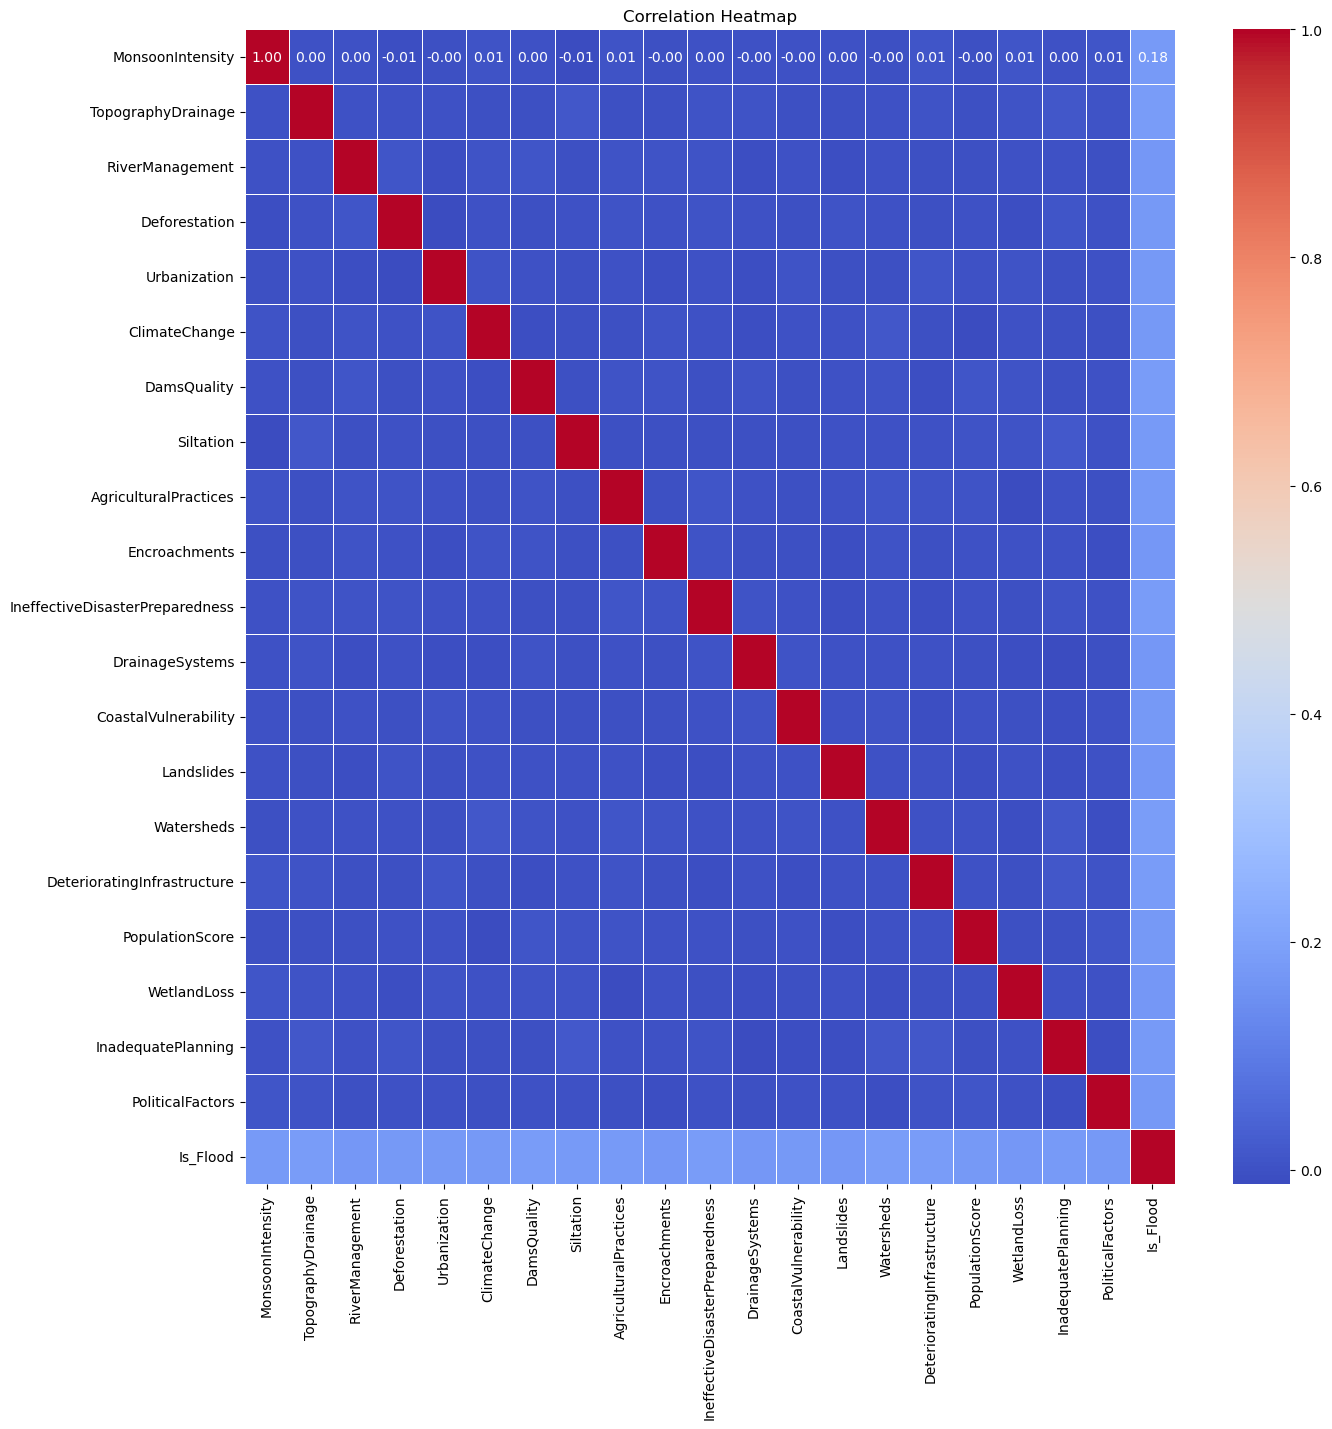

In [19]:
tmp = df.copy()
corr = tmp.corr()                             
plt.figure(figsize=(15,15 ))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# generally the attributes are not correlated with each other , so they are independent from each other

<function matplotlib.pyplot.show(close=None, block=None)>

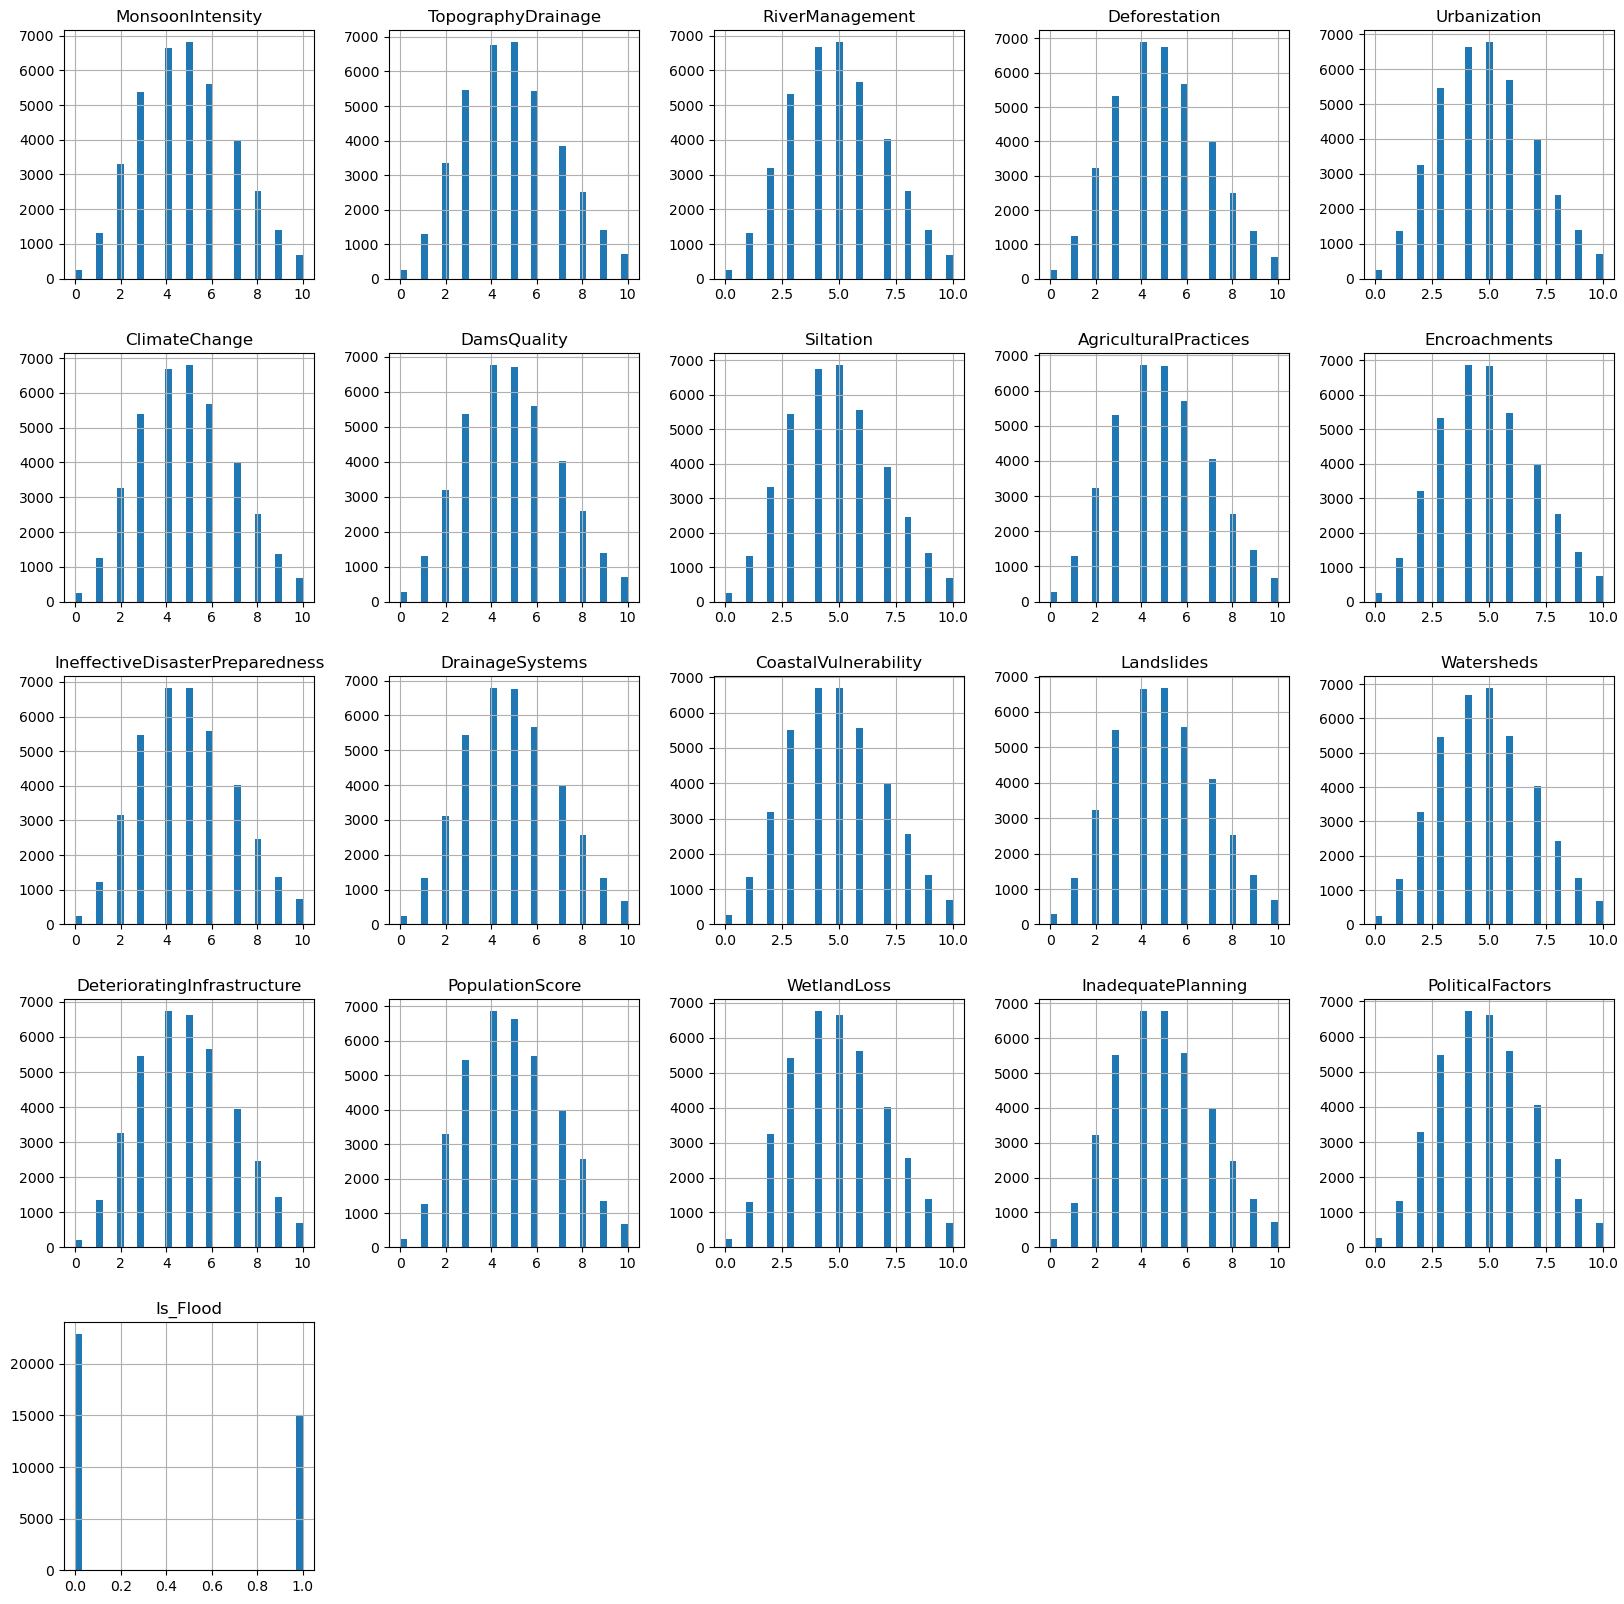

In [20]:
df.hist(bins = 33 ,figsize = (20,20))
plt.show
# after removing the outliers , we can see that the graphs become normally distributed( you can see the difference in Step 2)

#### K means for clustring

In [21]:
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k , random_state = 42).fit(df)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow graph')

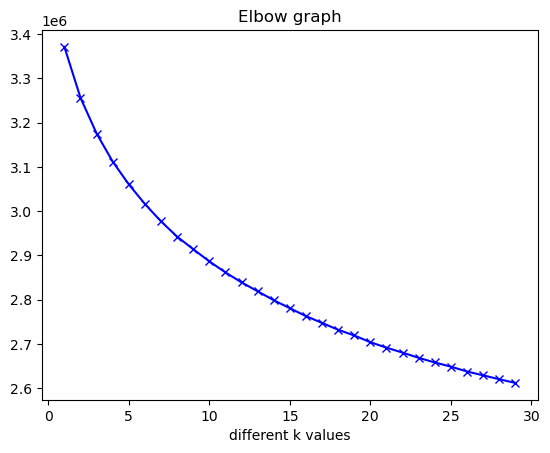

In [22]:
plt.plot(K,ssd,"bx-")
plt.xlabel("different k values")
plt.title("Elbow graph") 

In [23]:
# we can choose k as 5
kmeans = KMeans(n_clusters = 5 , random_state = 42).fit(df)
kmeans

KMeans(n_clusters=5, random_state=42)

In [24]:
clusters = kmeans.labels_

In [25]:
clusters

array([4, 4, 2, ..., 1, 2, 2])

In [26]:
centers = kmeans.cluster_centers_

In [27]:
centers

array([[4.81078861, 4.98398138, 4.99917853, 4.73726725, 7.68195509,
        5.24589266, 4.73822563, 4.75095838, 5.0266977 , 4.66073384,
        4.99192223, 4.8640471 , 4.90470975, 5.00054765, 4.6092552 ,
        5.34884995, 5.05407996, 4.76122673, 4.42401424, 5.03299562,
        0.49835706],
       [4.78932733, 4.79528602, 5.20180085, 5.17399364, 4.1050053 ,
        5.06620763, 5.09507415, 4.87473517, 6.09149894, 4.17200742,
        5.04939089, 4.90598517, 5.48013771, 5.24682203, 6.86400953,
        4.79237288, 5.00993114, 4.28747352, 4.29303496, 4.72947564,
        0.47364936],
       [4.81563641, 4.85716218, 5.05302313, 5.0165021 , 4.38225348,
        4.91803057, 5.09184364, 4.88800216, 4.62532125, 7.76315434,
        5.07615312, 4.88380901, 4.82835114, 4.6940349 , 4.7607196 ,
        4.75801434, 4.97605843, 4.85107534, 4.68551332, 4.6723928 ,
        0.45150818],
       [4.90425963, 5.33495605, 4.7867478 , 5.02285328, 4.46193374,
        4.77728195, 4.83272481, 5.39918864, 4.7356321

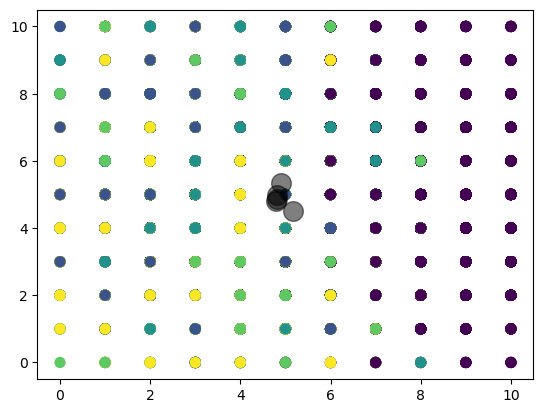

In [28]:
plt.scatter(df.iloc[:,4] , df.iloc[:,5], c = clusters , s = 50 , cmap = "viridis");
plt.scatter(centers[:,0] , centers[:,1] , c ="black" , s = 200  , alpha = 0.5); 
# we didnt do any label reducing , so just choose 2 attribute to visualize the points
# you can see cluster centers as well

In [29]:
pca_df = df.copy()
scaler = StandardScaler()
pca_df = scaler.fit_transform(pca_df)

In [30]:
# we reduced the label to 3 dimensional
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(pca_df)

In [31]:
two_component_df = pd.DataFrame(data = pca_fit , columns = ["first", "second" , "third"])

In [32]:
two_component_df

,first,second,third
0,1.192658,0.791349,-0.520726
1,1.047132,0.828586,2.361612
2,-1.147000,1.048177,-0.625489
3,-1.370459,0.812663,-1.439819
4,0.755103,0.474232,1.173539
...,...,...,...
37888,-1.265250,0.609172,0.235221
37889,-1.508049,0.553473,-0.529758
37890,-1.471159,-0.803115,0.649474
37891,1.575851,-1.265952,-0.523067


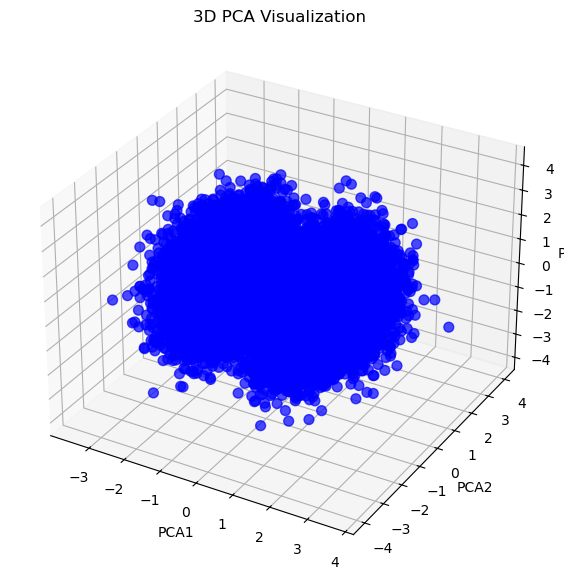

In [33]:
two_component_df = two_component_df.values
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(two_component_df[:, 0], two_component_df[:, 1], two_component_df[:, 2], c='blue', s=50, alpha=0.7)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.title("3D PCA Visualization")
plt.show()

we can see that there are some points a bit far away from the grouped cluster

# Step 4: Predictive Modelling

### split the data into train test 

In [34]:
X = df.drop("Is_Flood" , axis = 1 )

y = df["Is_Flood"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

### Model 1 : KNN Classifier

In [35]:
param_grid = {"n_neighbors": range(1,21), "p": [1, 2] }

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring="accuracy")

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 19, 'p': 2}


In [36]:
# final model
# parameters based on gridsearch
knn_model = KNeighborsClassifier(n_neighbors = 19 , p = 2).fit(X_train , y_train)

In [37]:
y_pred1 = knn_model.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred1)
precision_1 = precision_score(y_test, y_pred1)
recall_1 = recall_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)

In [38]:
accuracy_1

0.8716572836030964

In [39]:
precision_1

0.9662182361733931

In [40]:
recall_1

0.7059851463521188

In [41]:
f1_1

0.8158525810930204

In [42]:
r2_1 = r2_score(y_test , y_pred1)
r2_1

0.4664270626438415

### Model 2 : Random Forest Classifier

In [43]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 200}


In [44]:
# final model based on gridsearch best params
rf = RandomForestClassifier(max_depth = None , n_estimators = 200).fit(X_train , y_train)

In [45]:
y_pred2 = rf.predict(X_test)

In [46]:
accuracy_2 = accuracy_score(y_test, y_pred2)
precision_2 = precision_score(y_test, y_pred2)
recall_2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)

In [47]:
accuracy_2

0.881597466572836

In [48]:
precision_2

0.9714119019836639

In [49]:
recall_2

0.727391874180865

In [50]:
f1_2

0.8318760929303022

In [51]:
r2_2 = r2_score(y_test , y_pred2)
r2_2

0.5077524512122074

### Model 3 : Gradient Boosting Classifier

In [52]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_leaf': [1, 2]
}
gbm = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 200}


In [53]:
gbm_model = GradientBoostingClassifier(learning_rate = 0.1 , max_depth = 5 , min_samples_leaf = 2 , n_estimators = 200).fit(X_train , y_train)

In [54]:
y_pred3 = gbm_model.predict(X_test)

In [55]:
accuracy_3 = accuracy_score(y_test, y_pred3)
precision_3 = precision_score(y_test, y_pred3)
recall_3 = recall_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)

In [56]:
accuracy_3

0.9294510907811401

In [57]:
precision_3

0.9438175834508697

In [58]:
recall_3

0.8770205329838358

In [59]:
f1_3

0.9091938405797101

In [60]:
r2_3 = r2_score(y_test , y_pred3)
r2_3

0.7066994545855798

### Model 4 : Support Vector Regression

In [61]:

svr_model = SVR(kernel = 'rbf')
svr_model.fit(X_train, y_train)

SVR()

In [62]:
y_pred4 = svr_model.predict(X_test)

In [63]:
y_pred4 = (y_pred4 > 0.5).astype(int)
accuracy_4 = accuracy_score(y_test, y_pred4)
precision_4 = precision_score(y_test, y_pred4)
recall_4 = recall_score(y_test, y_pred4)
f1_4 = f1_score(y_test, y_pred4)

In [64]:
accuracy_4

0.9465165376495426

In [65]:
precision_4

0.9563218390804598

In [66]:
recall_4

0.9086937527304499

In [67]:
f1_4

0.931899641577061

In [68]:
r2_4 = r2_score(y_test , y_pred4)
r2_4

0.7776474668179956

#### Comment on Findings

##### We choose these models for some reasons:

for K Means Classifier :

    * it is easy to use and implement
    * one of the most popular ai model
    

for Random Forest Classifier:

    * it can produce high accuracy with the complicated datas
    * it is solid for noisy data and overfitting
    

for Gradient Boosting Classifier:

    * it produces high accuracy with complicated data
    * it can be optimized with a lot of hyperparameter , so it has a lot of options
    

for Support Vector Classifier:

    * it is flexible with choosing the kernel type
    * it reduces overfitting


we also tried other models like Decision Trees and Logistic Regression , but for logistic regression , it overfits with the data , and for the Decision Tree , it gives less accuracy score compared to other models , so we didnt use these models in out project

## Step 5: Model Evaluation and Visualizations

In [69]:
# some funcs to help the visualizing the graphs related with the models
def plot_matrix(c_modal, model_name, label, cmap = "Blues"):
  plt.figure(figsize=(6, 6))
  plt.matshow(c_modal, cmap=cmap)
  plt.title(f'Confusion Matrix for {model_name}', pad=20, fontsize=14)
  plt.colorbar()
  # X and Y-axis labels
  plt.xticks([0, 1], ['Negative', 'Positive'], fontsize=10)
  plt.yticks([0, 1], ['Negative', 'Positive'], fontsize=10)
  # Annotate the confusion matrix cells with values
  for i in range(c_modal.shape[0]):
      for j in range(c_modal.shape[1]):
          plt.text(j, i, f'{c_modal[i, j]}', ha='center', va='center', color='black', fontsize=12)
  plt.xlabel('Predicted', fontsize=12)
  plt.ylabel('True', fontsize=12)
  plt.grid(False)
  plt.show()

#### Graphs for KNN Classifier

<Figure size 600x600 with 0 Axes>

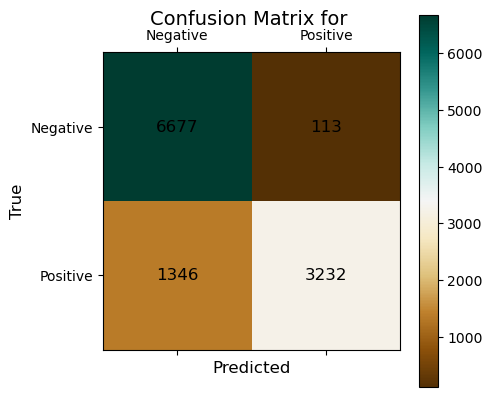

In [70]:
# confusion matrix
cm_kclass = confusion_matrix(y_test , y_pred1)
plot_matrix(cm_kclass , "" , "" , "BrBG")

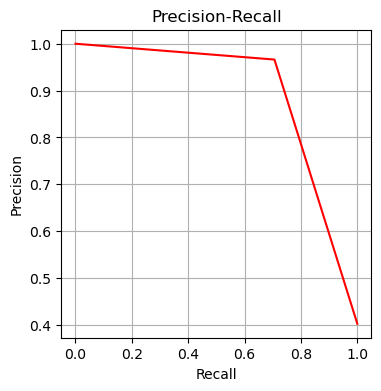

In [71]:
# PR curve
precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_pred1)
plt.figure(figsize=(4,4))
plt.plot(recall1, precision1, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.grid(True)
plt.show()

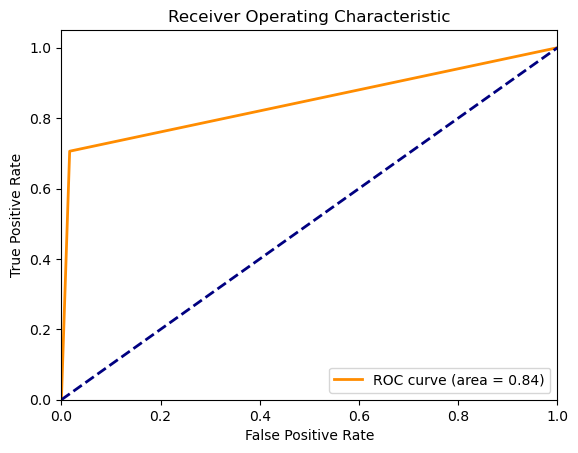

In [72]:
# ROC curve
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Graphs for Random Forest Classifier

<Figure size 600x600 with 0 Axes>

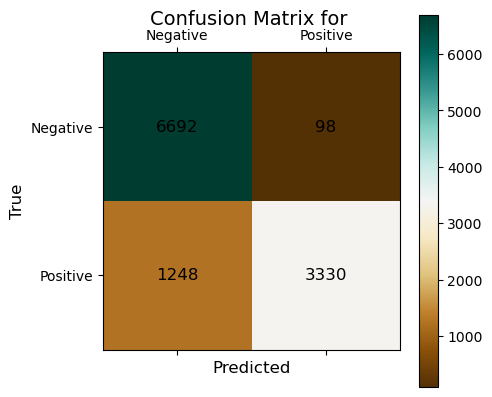

In [73]:
cm_kclass = confusion_matrix(y_test , y_pred2)
plot_matrix(cm_kclass , "" , "" , "BrBG")

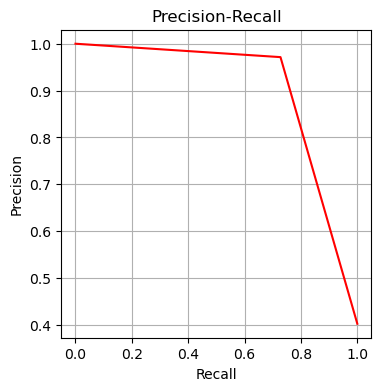

In [74]:
# PR curve
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_pred2)
plt.figure(figsize=(4,4))
plt.plot(recall2, precision2, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.grid(True)
plt.show()

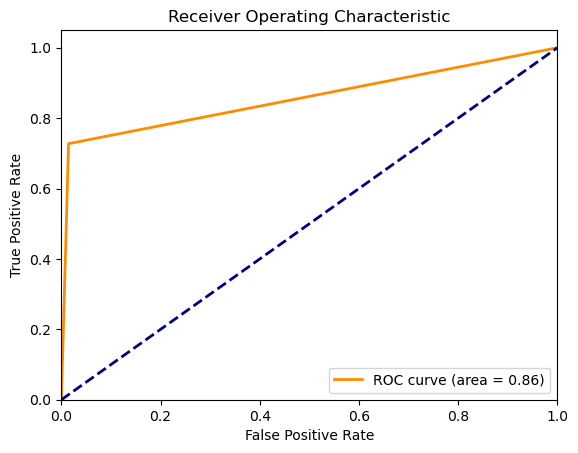

In [75]:
# ROC curve
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr2, tpr2)
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Graphs for Gradient Boosting Classifier

<Figure size 600x600 with 0 Axes>

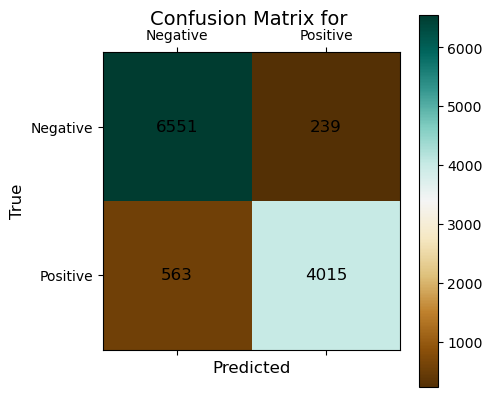

In [76]:
cm_kclass = confusion_matrix(y_test , y_pred3)
plot_matrix(cm_kclass , "" , "" , "BrBG")

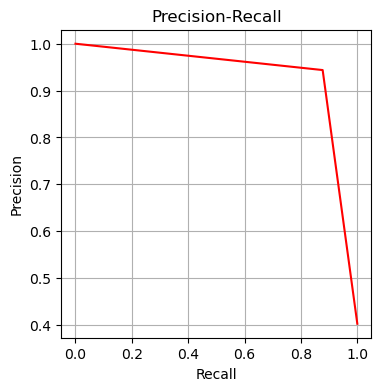

In [77]:
# PR curve
precision3, recall3, thresholds3 = precision_recall_curve(y_test, y_pred3)
plt.figure(figsize=(4,4))
plt.plot(recall3, precision3, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.grid(True)
plt.show()

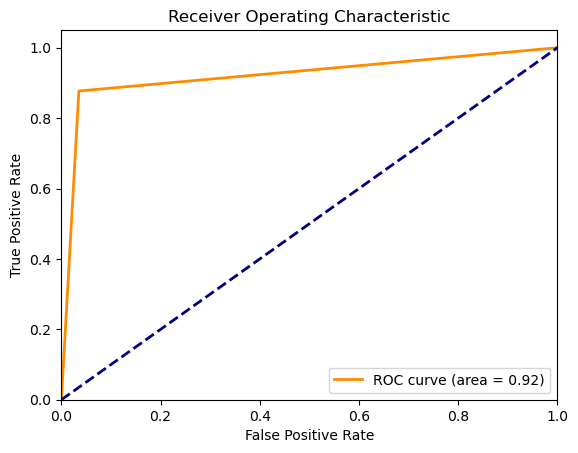

In [78]:
# ROC curve
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr3, tpr3)
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Graphs for Support Vector Regression

<Figure size 600x600 with 0 Axes>

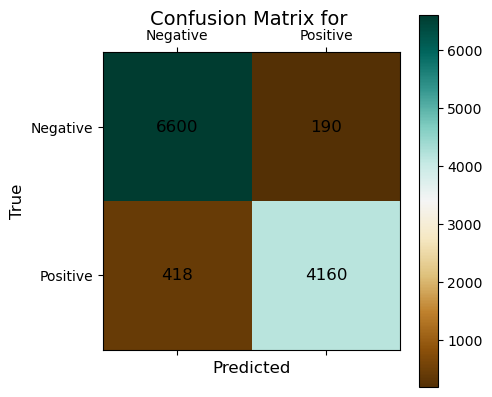

In [79]:
cm_kclass = confusion_matrix(y_test , y_pred4)
plot_matrix(cm_kclass , "" , "" , "BrBG")

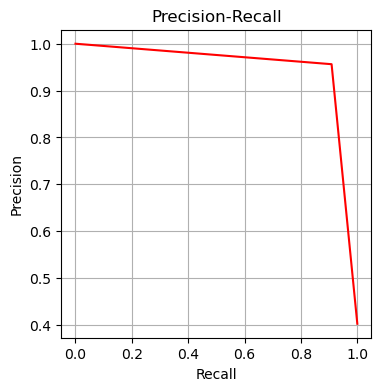

In [80]:
# PR curve
precision4, recall4, thresholds4 = precision_recall_curve(y_test, y_pred4)
plt.figure(figsize=(4,4))
plt.plot(recall4, precision4, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.grid(True)
plt.show()

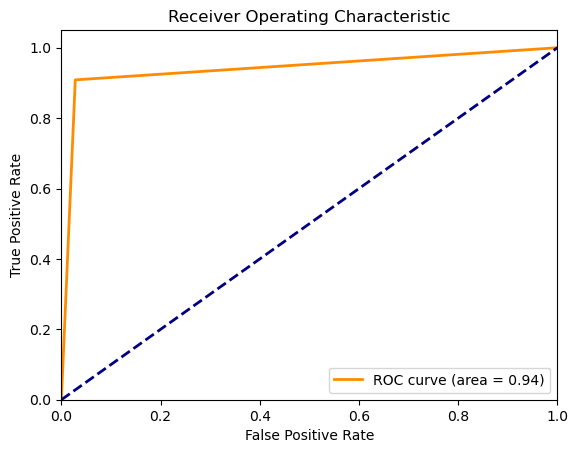

In [81]:
# ROC curve
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr4, tpr4)
plt.figure()
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [82]:
Model_infos = {
    'Model': ['K Means Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Support Vector Regression'],
    'Accuracy': [accuracy_1, accuracy_2, accuracy_3, accuracy_4],
    'Recall': [recall_1, recall_2, recall_3, recall_4],
    'Precision': [precision_1, precision_2, precision_3, precision_4],
    'R2': [r2_1, r2_2, r2_3, r2_4],
    'F1': [f1_1, f1_2, f1_3, f1_4]
}

infos = pd.DataFrame(Model_infos)
infos

,Model,Accuracy,Recall,Precision,R2,F1
0,K Means Classifier,0.871657,0.705985,0.966218,0.466427,0.815853
1,Random Forest Classifier,0.881597,0.727392,0.971412,0.507752,0.831876
2,Gradient Boosting Classifier,0.929451,0.877021,0.943818,0.706699,0.909194
3,Support Vector Regression,0.946517,0.908694,0.956322,0.777647,0.931900


## Comment on findings on the Graphs

* All of the models has r2 score > 0 , so they are better than a mean model

* K Means and Random Forest Classifier has top 2 highest score based on precision , so if we want to make models based on precision , we can choose one of them but , their accuracy , recall , r2 score and f1 score is lower than others , so based on the parameter , they can be an option 

* we can see that SVR has the highest r2 score  , it is nearest to 1

* SVR has the highest accuracy ,recall , f1 score , r2 score , so it is the best model for our data

* SVR has highest f1 score  , so it has the best balance for P R ( we can see on the graph )

* for an ideal roc curve has 1 area  ,so which model is nearest to 1 is better , we can see on the graph , SVR is nearest with the score 0.94

* for an alternate model , we can choose Gradient Boosting Classifier , it has second best scores in general

# Report

* First of all , we dowloand the data from the keggle( you can see the link at the beginning of the ipynb file)
* our data hs 50000 row and 21 attributes
* we imported the necessary libraries

* In data preprocessing and cleaning , we first checked the missing values , but there are no any missing value for all attributes
* Then we converted the target value( FloodProbability ) to 0 and 1 s to make a classification target .
* we dropped the duplicate values but there was no any duplicate row, so the df didnt changed
* we visualized the attributes to gain a general sight
* we looked for the outlier and handled them with removing , also we visualized the before and after boxplot graphs for every atribute to see the difference before handling the outliers
* after handling the outliers , we reindexed the data set and we have 37893 datas left

* In data exploration , we visualized the some features of the columns like mean median etc.
* we plotted a heatmap to see the correlations between the attributes
* we used histograms to visualize the distribution of the attributes
* Then , we use kmeans and pca to cluster the data , first we use kmeans and elbow method to choose the optimal k for our kmeans.
* we use pca to lower the labels and we visualized the data in 3d format using pca to have general idea about the distribution of the data

* In predictive modelling ,  first we split our data into train and test data ( 70% train , 30% test)
* then we tried different models , we choosed kmeans classifier , random forest , gradient boosting and support vector regression
* we also tried logistic regression and decision tree , but they are not very good at this dataset(lojistic regression overfitted , decision tree has lower accruacy score compared to other models)
* we use gridseacrh to find the optimal parameters and implement the cross validation
* we find accuracy , recall , precision , r2 score and f1 score for every model

* In model evaluation and visualization , we visualized the confusion matrix , PR and ROC curves for every model to compare them with each other
* Then we choose the best model for our data( SVR has best scores among the models)